In [1]:
from bigtester import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import median_abs_deviation

# Constants

def MonteCarlo(spread1, spread2, tag):

    DORAND = 5000  # Number of randomisations to perform

    # Load data (replace this with your actual data loading mechanism)
    # Example: spread1 and spread2 are numpy arrays loaded from a file
    # For demonstration, I'll create dummy data
    #spread1 = yolo[:,0]  # Replace with actual data
    #spread2 = yolo[:,1]  # Replace with actual data

    # Compute test statistics (difference between medians and means)
    medianSpreadDiff = np.median(spread2) - np.median(spread1)
    meanSpreadDiff = np.mean(spread2) - np.mean(spread1)

    # Combine data for randomisation
    totalSpread = np.concatenate((spread1, spread2))

    # Perform randomisation test
    randMedianSpreadDiff = np.full(DORAND, np.nan)
    randMeanSpreadDiff = np.full(DORAND, np.nan)

    for randPool in range(DORAND - 1):
        # Generate new spread1 and spread2 through random relabelling
        new1Index = np.random.permutation(60)
        newSpread1 = totalSpread[new1Index[:30]]
        newSpread2 = totalSpread[new1Index[30:60]]
        
        # Find and store difference between medians and means
        randMedianSpreadDiff[randPool] = np.median(newSpread2) - np.median(newSpread1)
        randMeanSpreadDiff[randPool] = np.mean(newSpread2) - np.mean(newSpread1)

    # Include originals as a possible randomisation
    randMedianSpreadDiff[-1] = medianSpreadDiff
    randMeanSpreadDiff[-1] = meanSpreadDiff

    p_value_mean = np.sum(np.abs(randMeanSpreadDiff) >= np.abs(meanSpreadDiff)) / DORAND

    # Calculate p-value for the median difference
    p_value_median = np.sum(np.abs(randMedianSpreadDiff) >= np.abs(medianSpreadDiff)) / DORAND

    # Print results
    print(f"P-value for mean difference: {p_value_mean}")
    print(f"P-value for median difference: {p_value_median}")

    # Interpret results
    if p_value_mean < 0.01:
        if meanSpreadDiff > 0:
            print("spread2 is statistically better than spread1.")
        else:
            print("spread1 is statistically better than spread2.")
    else:
        print("There is no statistically significant difference between spread1 and spread2.")

    # Visualise the results
    plt.figure(figsize=(10, 6))
    plt.hist(randMeanSpreadDiff, bins=100, color=[0.6, 0.6, 0.6], edgecolor=[0.6, 0.6, 0.6])
    plt.axvline(meanSpreadDiff, color='black', linestyle='--', linewidth=2, label='Diferença Observada')
    plt.scatter(meanSpreadDiff, 0, color='black', zorder=5, label='Diferença Observada')
    plt.title(tag, fontsize=14)
    plt.xlabel('Diferença entre as médias populacionais', fontsize=12)
    plt.ylabel('Frequência', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.show()

## GERAÇÃO

A função Comparador realiza cada algoritmo 30 vezes, com determinado k e número de iterações. O retorno é um array de 30 linhas e 6 colunas contendo as métricas de cada execução de cada algoritmo <br>

Coluna 1: Hipervolume do WDH <br>
Coluna 2: Hipervolume do NSGAII <br>
Coluna 3: d_min de WDH <br>
Coluna 4: d_min de NSGAII <br>
Coluna 5: d_med de WDH <br>
Coluna 6: d_med de NSGAII <br>

Quando a função termina, para cada coluna é impressa a média das execuções do algoritmo

## 30 ITERAÇÕES

In [6]:
results = Comparador(30, 30, 30, 0.05, 0.05, 1/30, 1/30)

0/30 CICLOS COMPLETOS
5/30 CICLOS COMPLETOS
10/30 CICLOS COMPLETOS
15/30 CICLOS COMPLETOS
20/30 CICLOS COMPLETOS
25/30 CICLOS COMPLETOS
HiperVolume WDH:  0.37285848593603554
HiperVolume NSGA-II:  0.40121897698210474
d_min WDH:  98.43333333333334
d_min NSGA-II:  41.5
d_med WDH:  181.81952084708004
d_med NSGA-II:  158.0124997029365


P-value for mean difference: 0.325
P-value for median difference: 0.696
There is no statistically significant difference between spread1 and spread2.


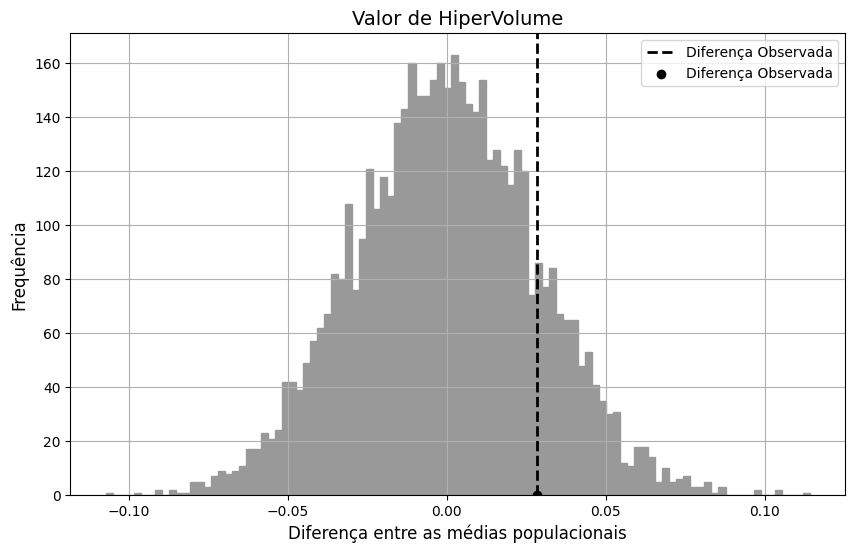

In [7]:
MonteCarlo(results[:,0], results[:,1], 'Valor de HiperVolume')

P-value for mean difference: 0.0002
P-value for median difference: 0.0002
spread1 is statistically better than spread2.


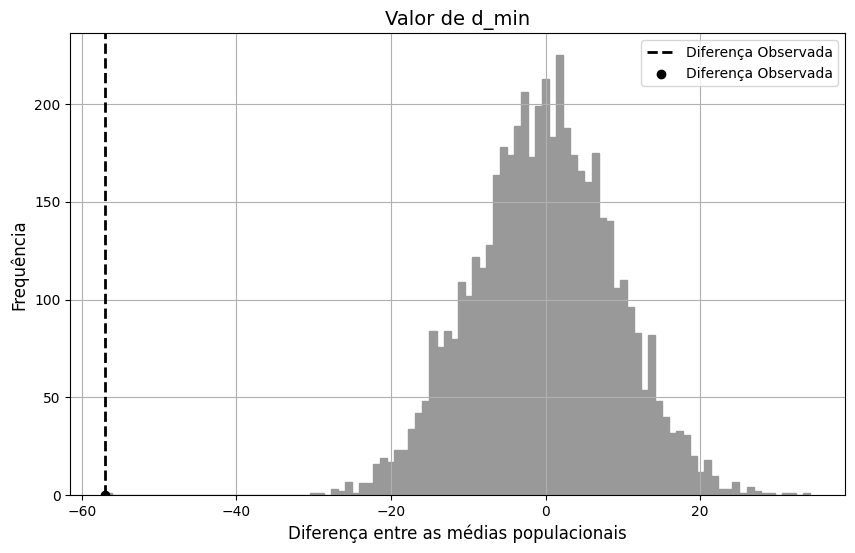

In [8]:
MonteCarlo(results[:,2], results[:,3], 'Valor de d_min')

P-value for mean difference: 0.0002
P-value for median difference: 0.0002
spread1 is statistically better than spread2.


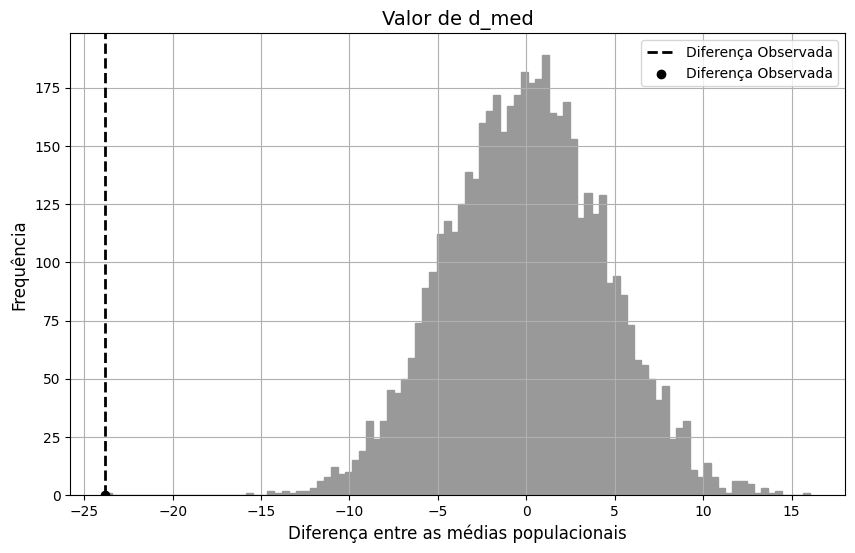

In [9]:
MonteCarlo(results[:,4], results[:,5], 'Valor de d_med')

## 100 ITERAÇÕES

In [10]:
results = Comparador(30, 30, 100, 0.05, 0.05, 1/30, 1/30)

0/30 CICLOS COMPLETOS
5/30 CICLOS COMPLETOS
10/30 CICLOS COMPLETOS
15/30 CICLOS COMPLETOS
20/30 CICLOS COMPLETOS
25/30 CICLOS COMPLETOS
HiperVolume WDH:  0.41719000121627253
HiperVolume NSGA-II:  0.41229041917632286
d_min WDH:  93.9
d_min NSGA-II:  33.233333333333334
d_med WDH:  163.8716931216931
d_med NSGA-II:  123.58912753147237


P-value for mean difference: 0.8694
P-value for median difference: 0.5016
There is no statistically significant difference between spread1 and spread2.


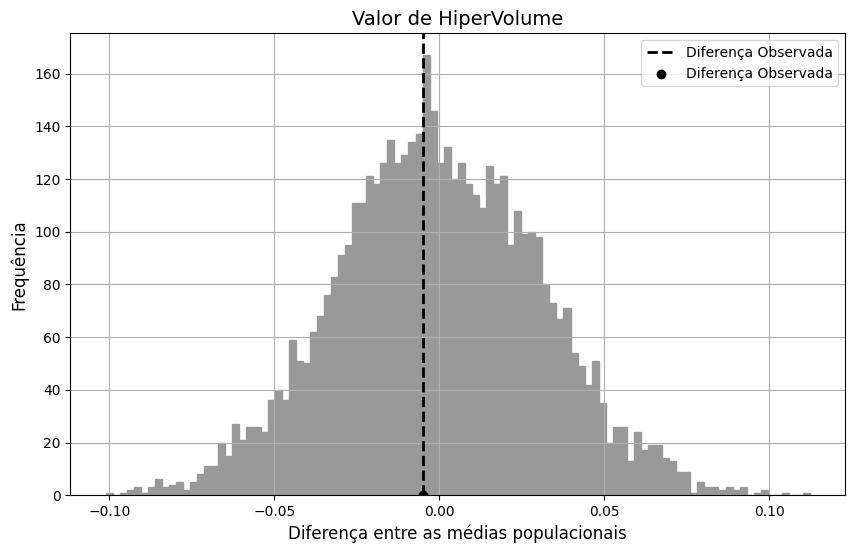

In [11]:
MonteCarlo(results[:,0], results[:,1], 'Valor de HiperVolume')

P-value for mean difference: 0.0002
P-value for median difference: 0.0002
spread1 is statistically better than spread2.


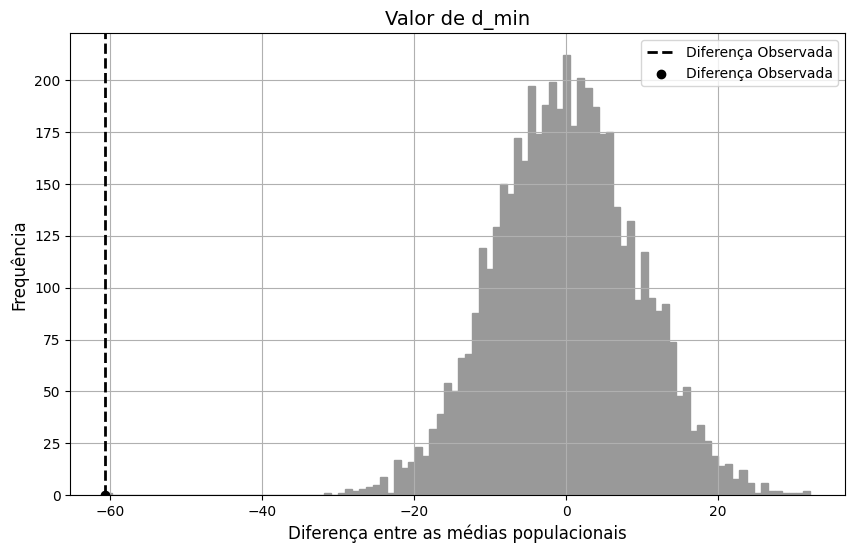

In [12]:
MonteCarlo(results[:,2], results[:,3], 'Valor de d_min')

P-value for mean difference: 0.0002
P-value for median difference: 0.0002
spread1 is statistically better than spread2.


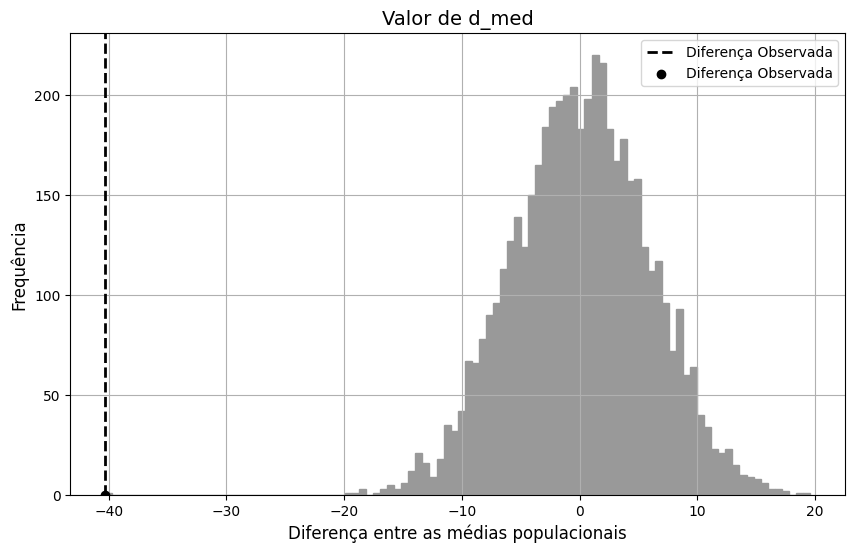

In [13]:
MonteCarlo(results[:,4], results[:,5], 'Valor de d_med')

## 300 ITERAÇÕES

In [14]:
results = Comparador(30, 30, 300, 0.05, 0.05, 1/30, 1/30)

0/30 CICLOS COMPLETOS
5/30 CICLOS COMPLETOS
10/30 CICLOS COMPLETOS
15/30 CICLOS COMPLETOS
20/30 CICLOS COMPLETOS
25/30 CICLOS COMPLETOS
HiperVolume WDH:  0.4102302145666554
HiperVolume NSGA-II:  0.4259633125673715
d_min WDH:  83.43333333333334
d_min NSGA-II:  25.766666666666666
d_med WDH:  151.34359458547266
d_med NSGA-II:  106.83156082317001


P-value for mean difference: 0.6348
P-value for median difference: 0.6826
There is no statistically significant difference between spread1 and spread2.


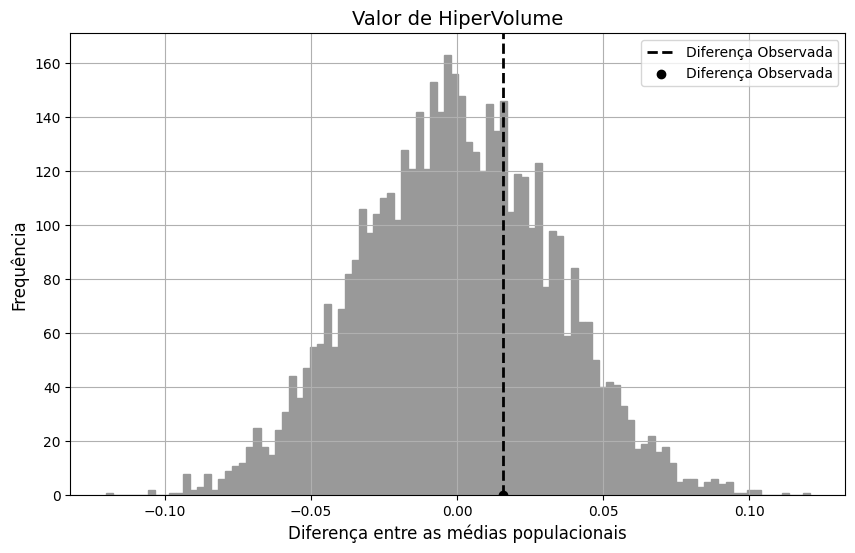

In [15]:
MonteCarlo(results[:,0], results[:,1], 'Valor de HiperVolume')

P-value for mean difference: 0.0002
P-value for median difference: 0.0002
spread1 is statistically better than spread2.


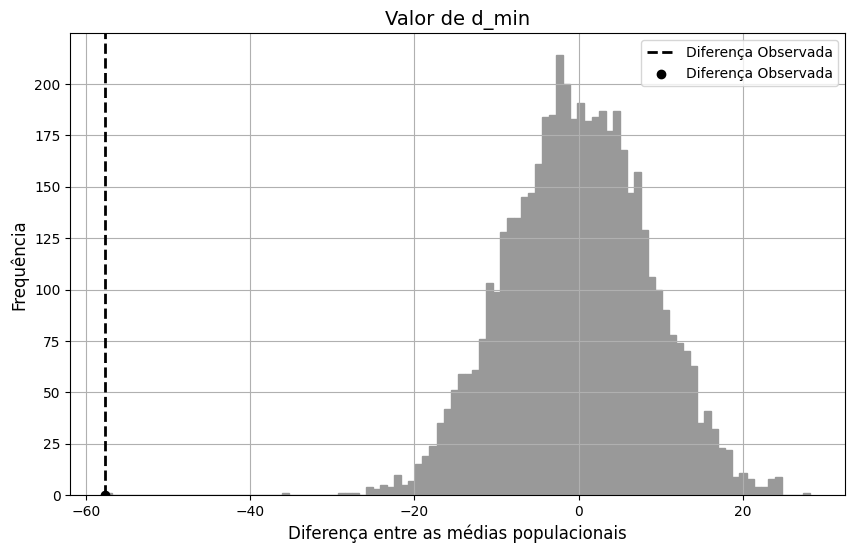

In [16]:
MonteCarlo(results[:,2], results[:,3], 'Valor de d_min')

P-value for mean difference: 0.0002
P-value for median difference: 0.0002
spread1 is statistically better than spread2.


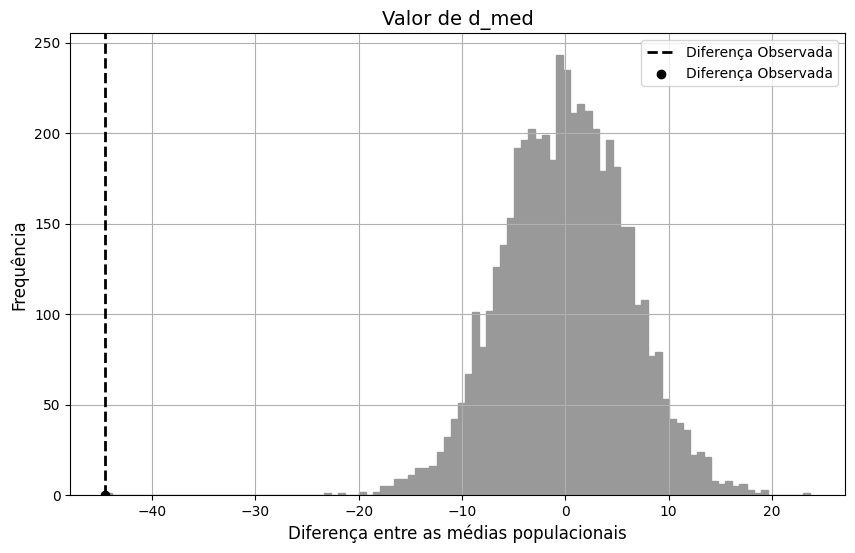

In [17]:
MonteCarlo(results[:,4], results[:,5], 'Valor de d_med')

## Exemplos

Aqui um exemplo de execução dos algoritmos em 100 iterações. Primeiramente, uma vista bidimensional de como ambos os algoritmos progridem em suas fronteiras pareto. No canto superior direito e de verde, a população inicial. Então, partindo do azul e terminando do verde, os resultados de cada iteração subsequente

0/100
50/100


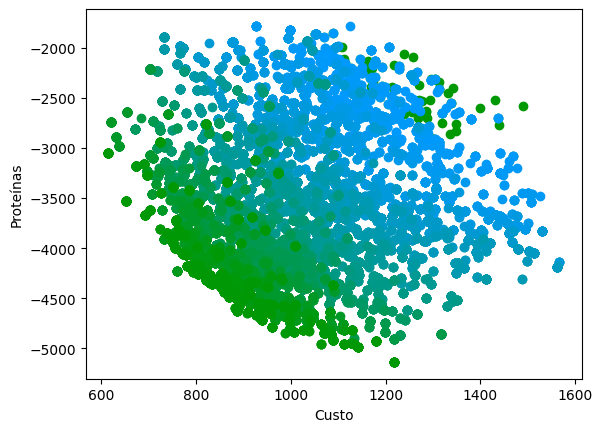

In [4]:
ExemploNSGAII = NSGAII(100, 100)

0/100
50/100


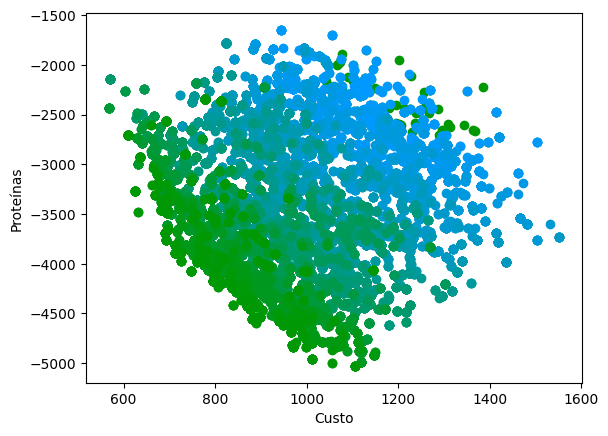

In [18]:
ExemploWDH = WDH(100, 100)

Visualização da fronteira pareto final, com os 3 objetivos

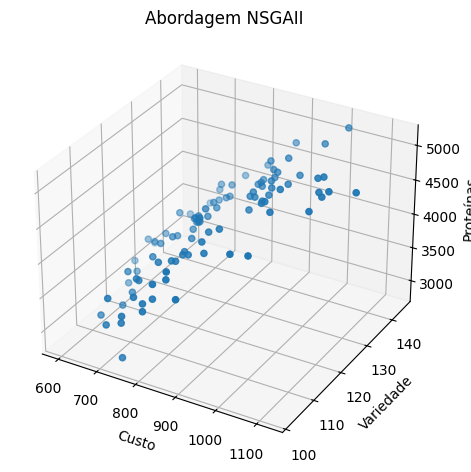

In [22]:
funcOBJ = calculaObjPop(ExemploNSGAII)
mask = is_pareto_efficient(funcOBJ)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_title("Abordagem NSGAII")
ax.set_xlabel("Custo")
ax.set_ylabel("Variedade")
ax.set_zlabel("Proteínas")
# Plot the data with customizations
scatter = ax.scatter(funcOBJ[mask][:,0], funcOBJ[mask][:,1], -funcOBJ[mask][:,2])

plt.tight_layout()
plt.show()

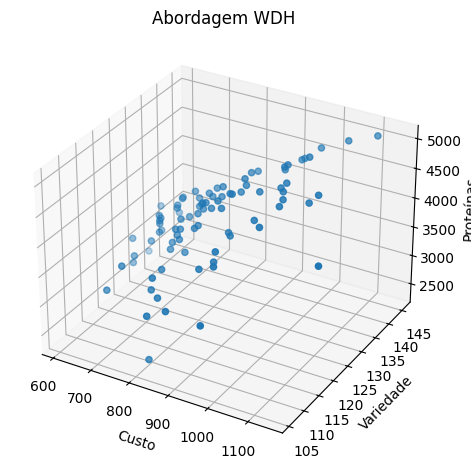

In [23]:
funcOBJ = calculaObjPop(ExemploWDH)
mask = is_pareto_efficient(funcOBJ)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.set_title("Abordagem WDH")
ax.set_xlabel("Custo")
ax.set_ylabel("Variedade")
ax.set_zlabel("Proteínas")
# Plot the data with customizations
scatter = ax.scatter(funcOBJ[mask][:,0], funcOBJ[mask][:,1], -funcOBJ[mask][:,2])

plt.tight_layout()
plt.show()

In [6]:
pontosDecisao(ExemploNSGAII)

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 